<a href="https://colab.research.google.com/github/ThiagoVisentimLopes/DataScience/blob/master/ProjetoPeneiraEstaticaML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [990]:
#pip install Office365-REST-Python-Client

In [991]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [992]:
# Leitura do arquivo Excel]
#df = pd.read_excel('Peneira.xlsx', sheet_name='Peneira',header=1)
df = pd.read_excel('Peneira.xlsx', sheet_name='Peneira',header=1)
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[1], axis=1)


In [993]:
# Selecionar as linhas 1, 2 e 3 e somar os valores
total_linhas = df.iloc[[1, 2, 3], :].sum()

# Adicionar uma nova linha com o total das linhas selecionadas
df.loc['Total'] = total_linhas

In [994]:
df = df.set_index('DIA').T

df.rename(columns={"PRODUÇÃO TERRAPRODUÇÃO FLUFFPRODUÇÃO RECT": "Total"}, inplace=True)

In [995]:
df['diasNumerados'] = range(1, len(df)+1)

In [996]:
df['Total Acumulado'] = df['Total'].cumsum()

In [997]:
df0 = df.iloc[:13, :].copy()

df13 = df.iloc[13:, :].copy()

In [998]:
df13['Total Acumulado Novo'] = df13['Total'].cumsum()

In [999]:
df13

DIA,SEMANA,PRODUÇÃO TERRA,PRODUÇÃO FLUFF,PRODUÇÃO RECT,TEMPO PROGRAMADO PRODUÇÃO (horas),TEMPO DE PARADA (horas),UTILIZAÇÃO (%),NaN,Real,Realizado Projeção,...,Real Peneira Projeção,,Real,Realizado Projeção,Real Peneira,Real Peneira Projeção,Total,diasNumerados,Total Acumulado,Total Acumulado Novo
14,NaN,105.63,0.0,150.47,8.0,3.21,0.59875,NaN,NaN,45.0,...,256.1,NaN,NaN,532.61,NaN,NaN,256.1,14,843.47,256.1
15,NaN,93.84,0.0,108.77,8.0,3.57,0.55375,NaN,NaN,45.0,...,202.61,NaN,NaN,622.61,NaN,NaN,202.61,15,1046.08,458.71
16,NaN,53.22,0.0,31.36,9.0,5.58,0.38,NaN,NaN,45.0,...,84.58,NaN,NaN,622.61,NaN,NaN,84.58,16,1130.66,543.29
17,NaN,0.0,0.0,0.0,8.0,8.0,0.0,NaN,NaN,45.0,...,0.0,NaN,NaN,622.61,NaN,NaN,0.0,17,1130.66,543.29
18,NaN,76.99,0.0,42.61,8.0,6.09,0.23875,NaN,NaN,45.0,...,119.6,NaN,NaN,622.61,NaN,NaN,119.6,18,1250.26,662.89
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,19,1250.26,662.89
20,NaN,0.0,0.0,0.0,8.0,8.0,0.0,NaN,NaN,45.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,20,1250.26,662.89
21,NaN,79.61,0.0,42.61,8.0,2.07,0.74125,NaN,NaN,45.0,...,122.22,NaN,NaN,NaN,NaN,NaN,122.22,21,1372.48,785.11
22,NaN,87.14,0.0,67.81,8.0,3.3,0.5875,NaN,NaN,45.0,...,154.95,NaN,NaN,NaN,NaN,NaN,154.95,22,1527.43,940.06
23,NaN,100.7,0.0,114.11,8.0,2.0,0.75,NaN,NaN,45.0,...,214.81,NaN,NaN,NaN,NaN,NaN,214.81,23,1742.24,1154.87


In [1000]:
#Gerando dados de teste
TesteDf13 = pd.DataFrame({'diasNumerados': range(0, 14)})
TesteDf0 = pd.DataFrame({'diasNumerados': range(14, 31)})
TesteDf13Inicio = pd.DataFrame({'diasNumerados': range(18, 31)})

In [1001]:
dias = pd.DataFrame({'Dia': range(1, 31)})

In [1002]:
df13['diasNumeradosInicio'] = range(1, 18)

In [1003]:
regDf0 = LinearRegression().fit(np.array(df0['diasNumerados']).reshape(-1, 1), df0['Total Acumulado'])
LinearPredictDf0 = regDf0.predict(TesteDf0)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [1004]:
regDf13 = LinearRegression().fit(np.array(df13['diasNumerados']).reshape(-1, 1), df13['Total Acumulado'])
LinearPredictDf13 = regDf13.predict(TesteDf13)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [1005]:
df13

DIA,SEMANA,PRODUÇÃO TERRA,PRODUÇÃO FLUFF,PRODUÇÃO RECT,TEMPO PROGRAMADO PRODUÇÃO (horas),TEMPO DE PARADA (horas),UTILIZAÇÃO (%),NaN,Real,Realizado Projeção,...,,Real,Realizado Projeção,Real Peneira,Real Peneira Projeção,Total,diasNumerados,Total Acumulado,Total Acumulado Novo,diasNumeradosInicio
14,NaN,105.63,0.0,150.47,8.0,3.21,0.59875,NaN,NaN,45.0,...,NaN,NaN,532.61,NaN,NaN,256.1,14,843.47,256.1,1
15,NaN,93.84,0.0,108.77,8.0,3.57,0.55375,NaN,NaN,45.0,...,NaN,NaN,622.61,NaN,NaN,202.61,15,1046.08,458.71,2
16,NaN,53.22,0.0,31.36,9.0,5.58,0.38,NaN,NaN,45.0,...,NaN,NaN,622.61,NaN,NaN,84.58,16,1130.66,543.29,3
17,NaN,0.0,0.0,0.0,8.0,8.0,0.0,NaN,NaN,45.0,...,NaN,NaN,622.61,NaN,NaN,0.0,17,1130.66,543.29,4
18,NaN,76.99,0.0,42.61,8.0,6.09,0.23875,NaN,NaN,45.0,...,NaN,NaN,622.61,NaN,NaN,119.6,18,1250.26,662.89,5
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,0.0,19,1250.26,662.89,6
20,NaN,0.0,0.0,0.0,8.0,8.0,0.0,NaN,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,0.0,20,1250.26,662.89,7
21,NaN,79.61,0.0,42.61,8.0,2.07,0.74125,NaN,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,122.22,21,1372.48,785.11,8
22,NaN,87.14,0.0,67.81,8.0,3.3,0.5875,NaN,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,154.95,22,1527.43,940.06,9
23,NaN,100.7,0.0,114.11,8.0,2.0,0.75,NaN,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,214.81,23,1742.24,1154.87,10


In [1006]:
dataTeste = pd.DataFrame({'novaDATA': range(18, 31)})

In [1007]:
dataTeste

,novaDATA
0,18
1,19
2,20
3,21
4,22
5,23
6,24
7,25
8,26
9,27


In [1008]:
df13.head(13)['Total Acumulado Novo']

14      256.1
15     458.71
16     543.29
17     543.29
18     662.89
19     662.89
20     662.89
21     785.11
22     940.06
23    1154.87
24    1423.43
25    1423.43
26    1423.43
Name: Total Acumulado Novo, dtype: object

In [1009]:
# Importar pacotes necessários
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Separar dados em treino e teste
X_train = np.array(df13.head(13)['diasNumeradosInicio']).reshape(-1, 1)
y_train = df13.head(13)['Total Acumulado Novo']

# Definir modelo SVM
model = SVR(kernel='rbf')

# Treinar modelo
model.fit(X_train, y_train)

# Fazer previsão
y_pred = model.predict(TesteDf13Inicio)

# Avaliar desempenho do modelo
#mse = mean_squared_error(df13['Total Acumulado Novo'], y_pred)
print("Erro quadrático médio do modelo: {:.2f}".format(mse))

Erro quadrático médio do modelo: 24865420.10


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [1010]:
df13.head(13)['diasNumeradosInicio']

14     1
15     2
16     3
17     4
18     5
19     6
20     7
21     8
22     9
23    10
24    11
25    12
26    13
Name: diasNumeradosInicio, dtype: int64

In [1011]:
dataTeste

,novaDATA
0,18
1,19
2,20
3,21
4,22
5,23
6,24
7,25
8,26
9,27


In [1012]:
regDf13Inicio = LinearRegression().fit(np.array(df13.head(13)['diasNumeradosInicio']).reshape(-1, 1), df13.head(13)['Total Acumulado Novo'])
LinearPredictDf13Inicio = regDf13Inicio.predict(TesteDf13Inicio)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [1013]:
len(TesteDf13Inicio)



13

In [1014]:
LinearPredictDf13

array([-1031.75765686,  -906.81948529,  -781.88131373,  -656.94314216,
        -532.00497059,  -407.06679902,  -282.12862745,  -157.19045588,
         -32.25228431,    92.68588725,   217.62405882,   342.56223039,
         467.50040196,   592.43857353])

In [1015]:
LinearPredictDf13_pos = np.clip(LinearPredictDf13, a_min=0, a_max=None)

In [1016]:
LinearPredictDf13_pos

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  92.68588725, 217.62405882, 342.56223039,
       467.50040196, 592.43857353])

In [1017]:
df13

DIA,SEMANA,PRODUÇÃO TERRA,PRODUÇÃO FLUFF,PRODUÇÃO RECT,TEMPO PROGRAMADO PRODUÇÃO (horas),TEMPO DE PARADA (horas),UTILIZAÇÃO (%),NaN,Real,Realizado Projeção,...,,Real,Realizado Projeção,Real Peneira,Real Peneira Projeção,Total,diasNumerados,Total Acumulado,Total Acumulado Novo,diasNumeradosInicio
14,NaN,105.63,0.0,150.47,8.0,3.21,0.59875,NaN,NaN,45.0,...,NaN,NaN,532.61,NaN,NaN,256.1,14,843.47,256.1,1
15,NaN,93.84,0.0,108.77,8.0,3.57,0.55375,NaN,NaN,45.0,...,NaN,NaN,622.61,NaN,NaN,202.61,15,1046.08,458.71,2
16,NaN,53.22,0.0,31.36,9.0,5.58,0.38,NaN,NaN,45.0,...,NaN,NaN,622.61,NaN,NaN,84.58,16,1130.66,543.29,3
17,NaN,0.0,0.0,0.0,8.0,8.0,0.0,NaN,NaN,45.0,...,NaN,NaN,622.61,NaN,NaN,0.0,17,1130.66,543.29,4
18,NaN,76.99,0.0,42.61,8.0,6.09,0.23875,NaN,NaN,45.0,...,NaN,NaN,622.61,NaN,NaN,119.6,18,1250.26,662.89,5
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,0.0,19,1250.26,662.89,6
20,NaN,0.0,0.0,0.0,8.0,8.0,0.0,NaN,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,0.0,20,1250.26,662.89,7
21,NaN,79.61,0.0,42.61,8.0,2.07,0.74125,NaN,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,122.22,21,1372.48,785.11,8
22,NaN,87.14,0.0,67.81,8.0,3.3,0.5875,NaN,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,154.95,22,1527.43,940.06,9
23,NaN,100.7,0.0,114.11,8.0,2.0,0.75,NaN,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,214.81,23,1742.24,1154.87,10


In [1018]:
len(LinearPredictDf13Inicio)

13

In [1019]:
df13.head(13)['diasNumeradosInicio']

14     1
15     2
16     3
17     4
18     5
19     6
20     7
21     8
22     9
23    10
24    11
25    12
26    13
Name: diasNumeradosInicio, dtype: int64

In [1020]:
LinearPredictDf13_pos

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  92.68588725, 217.62405882, 342.56223039,
       467.50040196, 592.43857353])

In [1021]:
LinearPredictDf13

array([-1031.75765686,  -906.81948529,  -781.88131373,  -656.94314216,
        -532.00497059,  -407.06679902,  -282.12862745,  -157.19045588,
         -32.25228431,    92.68588725,   217.62405882,   342.56223039,
         467.50040196,   592.43857353])

In [1022]:
df13.head(13)['diasNumeradosInicio']

14     1
15     2
16     3
17     4
18     5
19     6
20     7
21     8
22     9
23    10
24    11
25    12
26    13
Name: diasNumeradosInicio, dtype: int64

In [1023]:
y_pred

array([666.25873027, 666.09140089, 666.01504211, 665.98485608,
       665.97451456, 665.97144365, 665.97065318, 665.9704768 ,
       665.97044269, 665.97043697, 665.97043613, 665.97043603,
       665.97043602])

In [1024]:
np.array(df13['diasNumeradosInicio'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [1025]:
df13['Total Acumulado Novo']

14       256.1
15      458.71
16      543.29
17      543.29
18      662.89
19      662.89
20      662.89
21      785.11
22      940.06
23     1154.87
24     1423.43
25     1423.43
26     1423.43
27    1697.944
28    1947.994
29    2104.594
30    2510.784
Name: Total Acumulado Novo, dtype: object

In [1026]:
TesteDf13Inicio

,diasNumerados
0,18
1,19
2,20
3,21
4,22
5,23
6,24
7,25
8,26
9,27


In [1027]:
y_pred

array([666.25873027, 666.09140089, 666.01504211, 665.98485608,
       665.97451456, 665.97144365, 665.97065318, 665.9704768 ,
       665.97044269, 665.97043697, 665.97043613, 665.97043603,
       665.97043602])

In [1028]:
df13['diasNumeradosInicio']

14     1
15     2
16     3
17     4
18     5
19     6
20     7
21     8
22     9
23    10
24    11
25    12
26    13
27    14
28    15
29    16
30    17
Name: diasNumeradosInicio, dtype: int64

In [1029]:
df13['Total Acumulado Novo']

14       256.1
15      458.71
16      543.29
17      543.29
18      662.89
19      662.89
20      662.89
21      785.11
22      940.06
23     1154.87
24     1423.43
25     1423.43
26     1423.43
27    1697.944
28    1947.994
29    2104.594
30    2510.784
Name: Total Acumulado Novo, dtype: object

In [1030]:
y_pred

array([666.25873027, 666.09140089, 666.01504211, 665.98485608,
       665.97451456, 665.97144365, 665.97065318, 665.9704768 ,
       665.97044269, 665.97043697, 665.97043613, 665.97043603,
       665.97043602])

In [1031]:
df13['diasNumeradosInicio']

14     1
15     2
16     3
17     4
18     5
19     6
20     7
21     8
22     9
23    10
24    11
25    12
26    13
27    14
28    15
29    16
30    17
Name: diasNumeradosInicio, dtype: int64

In [ ]:
np.array(df13['diasNumeradosInicio']).reshape(-1, 1)

# DF13

In [1129]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Separar dados em treino e teste
X_train = np.array(df13['diasNumeradosInicio']).reshape(-1, 1)
y_train = df13['Total Acumulado Novo']

# Normalizar dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Definir modelo SVM
model = SVR(kernel='poly',gamma="auto", degree=2, C=40, epsilon=0.1, coef0=30)

# Treinar modelo
model.fit(X_train_norm, y_train)

# Normalizar dados de teste
X_test_norm = scaler.transform(TesteDf13Inicio)

# Fazer previsão
y_pred = model.predict(X_test_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [1094]:
len(np.array(df13['diasNumeradosInicio']).reshape(-1, 1))

17

In [1125]:
# Calcular RMSE
y_true = df.tail(13)['diasNumerados'] # valores reais da variável de destino no conjunto de teste
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE:', rmse)

RMSE: 2509.6637928686855


In [ ]:
df

# DF0 Ignorar por enquanto (ficou abaixo do acumulado, estranho)

In [1143]:
#APENAS TESTE DF0

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Separar dados em treino e teste
X_train = np.array(df0['diasNumerados']).reshape(-1, 1)
y_train = df0['Total Acumulado']

# Normalizar dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Definir modelo SVM
model = SVR(kernel='poly', degree=3, C=10, epsilon=0.1, coef0=50)

# Treinar modelo
model.fit(X_train_norm, y_train)

# Normalizar dados de teste
X_test_norm = scaler.transform(TesteDf0)

# Fazer previsão
y_pred2 = model.predict(X_test_norm)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [1034]:
y_pred

array([ 2919.94355236,  3396.21147471,  3945.39378765,  4573.3966731 ,
        5286.12631298,  6089.48888919,  6989.39058365,  7991.73757826,
        9102.43605495, 10327.39219562, 11672.51218218, 13143.70219655,
       14746.86842064])

In [1035]:
y_pred

array([ 2919.94355236,  3396.21147471,  3945.39378765,  4573.3966731 ,
        5286.12631298,  6089.48888919,  6989.39058365,  7991.73757826,
        9102.43605495, 10327.39219562, 11672.51218218, 13143.70219655,
       14746.86842064])

In [1036]:
X_train

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13]])

In [1037]:
TesteDf13Inicio

,diasNumerados
0,18
1,19
2,20
3,21
4,22
5,23
6,24
7,25
8,26
9,27


In [1038]:
df13['diasNumeradosInicio']

14     1
15     2
16     3
17     4
18     5
19     6
20     7
21     8
22     9
23    10
24    11
25    12
26    13
27    14
28    15
29    16
30    17
Name: diasNumeradosInicio, dtype: int64

# Plotando grafico

In [1039]:
y_pred

array([ 2919.94355236,  3396.21147471,  3945.39378765,  4573.3966731 ,
        5286.12631298,  6089.48888919,  6989.39058365,  7991.73757826,
        9102.43605495, 10327.39219562, 11672.51218218, 13143.70219655,
       14746.86842064])

In [ ]:
TesteDf13Inicio

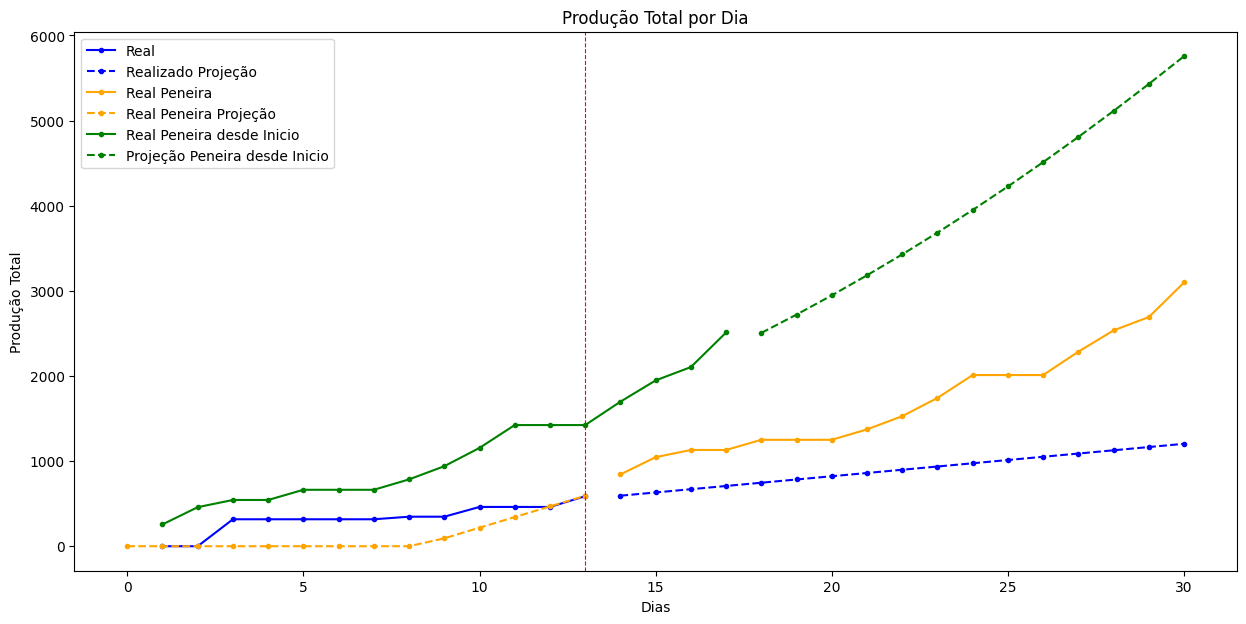

In [1145]:
# plotar gráfico de linha
plt.figure(figsize=(15,7))
#conjunto1
plt.plot(df0['diasNumerados'], df0['Total Acumulado'],color='blue',label='Real',marker='.')
plt.plot(TesteDf0['diasNumerados'], LinearPredictDf0,color='blue', linestyle='--',label='Realizado Projeção',marker='.')
#plt.plot(TesteDf0['diasNumerados'], y_pred2,color='red', linestyle='--',label='Realizado Projeção',marker='.')
#conjunto2
plt.plot(df13['diasNumerados'], df13['Total Acumulado'],color='orange',label='Real Peneira',marker='.')
plt.plot(TesteDf13['diasNumerados'], LinearPredictDf13_pos,color='orange', linestyle='--',label='Real Peneira Projeção',marker='.')

#conjunto3
plt.plot(df13['diasNumeradosInicio'], df13['Total Acumulado Novo'],color='green', linestyle='-',label='Real Peneira desde Inicio',marker='.')
plt.plot(TesteDf13Inicio['diasNumerados'].to_numpy(), y_pred,color='green', linestyle='--',label='Projeção Peneira desde Inicio',marker='.')

plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
# adicionar título ao gráfico
plt.title('Produção Total por Dia')

# adicionar rótulos nos eixos x e y
plt.xlabel('Dias')
plt.ylabel('Produção Total')

# adicionar legenda
plt.legend()

# exibir o gráfico
plt.show()

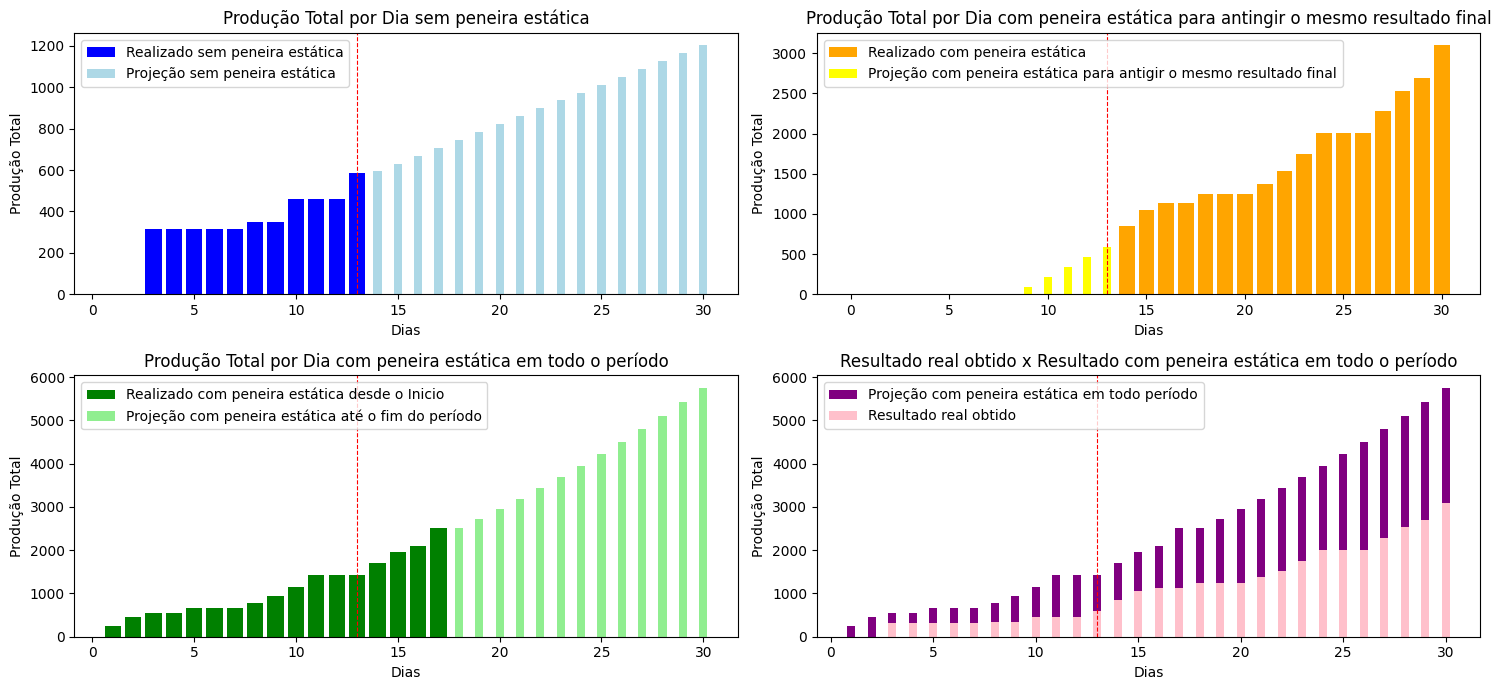

In [1156]:
# plotar gráfico de barras
plt.figure(figsize=(15,7))

bar_width = 0.4

# primeiro conjunto de dados
plt.subplot(2,2,1)
plt.bar(df0['diasNumerados'], df0['Total Acumulado'], color='blue', label='Realizado sem peneira estática')
plt.bar(TesteDf0['diasNumerados'], LinearPredictDf0, color='lightblue', label='Projeção sem peneira estática', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Produção Total por Dia sem peneira estática')
plt.xlabel('Dias')
plt.ylabel('Produção Total')
plt.legend()

# segundo conjunto de dados
plt.subplot(2,2,2)
plt.bar(df13['diasNumerados'], df13['Total Acumulado'], color='orange', label='Realizado com peneira estática')
plt.bar(TesteDf13['diasNumerados'], LinearPredictDf13_pos, color='yellow', label='Projeção com peneira estática para antigir o mesmo resultado final', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Produção Total por Dia com peneira estática para antingir o mesmo resultado final')
plt.xlabel('Dias')
plt.ylabel('Produção Total')
plt.legend()

# terceiro conjunto de dados
plt.subplot(2,2,3)
plt.bar(df13['diasNumeradosInicio'], df13['Total Acumulado Novo'], color='green', label='Realizado com peneira estática desde o Inicio')
plt.bar(TesteDf13Inicio['diasNumerados'].to_numpy(), y_pred, color='lightgreen', label='Projeção com peneira estática até o fim do período', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Produção Total por Dia com peneira estática em todo o período')
plt.xlabel('Dias')
plt.ylabel('Produção Total')
plt.legend()

# quarto conjunto de dados
plt.subplot(2,2,4)

plt.bar(df13['diasNumeradosInicio'], df13['Total Acumulado Novo'], color='purple', width=bar_width)
plt.bar(TesteDf13Inicio['diasNumerados'].to_numpy(), y_pred, color='purple', label='Projeção com peneira estática em todo período', width=bar_width)
plt.bar(df['diasNumerados'], df['Total Acumulado'], color='pink', label='Resultado real obtido', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Resultado real obtido x Resultado com peneira estática em todo o período')
plt.xlabel('Dias')
plt.ylabel('Produção Total')
plt.legend()

plt.tight_layout()

# exibir o gráfico
plt.show()

In [ ]:
df